# Imports

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'D:\\projects\\translator'

In [3]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import librosa
from librosa import display

In [5]:
path = Path('C:/Users/jpatn/data/translator/')
audio_fp   = path/'audio'
m_audio    = audio_fp/'macys'
t_audio    = audio_fp/'target'
spectro_fp = path/'spectros'
m_spectros = spectro_fp/'macys'
t_spectros = spectro_fp/'target'
f_audio    = audio_fp/'forever21'
f_spectro  = spectro_fp/'forever21'
h_audio    = audio_fp/'hm'
h_spectro  = spectro_fp/'hm'
l_audio    = audio_fp/'lordandtaylor'
l_spectro  = spectro_fp/'lordandtaylor'
w_audio    = audio_fp/'walmart'
w_spectro  = spectro_fp/'walmart'
o_audio    = audio_fp/'oldnavy'
o_spectro  = spectro_fp/'oldnavy'
j_audio    = audio_fp/'jcpenney'
j_spectro  = spectro_fp/'jcpenney'
g_audio    = audio_fp/'gap'
g_spectro  = spectro_fp/'gap'

# Create Spectrograms

In [6]:
def create_spectros(fp,spectro,audio):
    get_sp_path = lambda x: spectro/x.relative_to(audio)
    sig,fs = librosa.load(fp)
    sv_path = str(get_sp_path(fp)).replace('wav','jpg')
    plt.axis('off')
    plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    S = librosa.feature.melspectrogram(y=sig,sr=fs)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max))
    plt.savefig(sv_path,bbox_inches=None,pad_inches=0)
    plt.close()

In [13]:
for fl in get_files(m_audio):
    create_spectros(fl,m_spectros,m_audio)
for fl in get_files(t_audio):
    create_spectros(fl,t_spectros,t_audio)
for fl in get_files(o_audio):
    create_spectros(fl,o_spectro,o_audio)
for fl in get_files(f_audio):
    create_spectros(fl,f_spectro,f_audio)
for fl in get_files(h_audio):
    create_spectros(fl,h_spectro,h_audio)
for fl in get_files(l_audio):
    create_spectros(fl,l_spectro,l_audio)
for fl in get_files(w_audio):
    create_spectros(fl,w_spectro,w_audio)
for fl in get_files(j_audio):
    create_spectros(fl,j_spectro,j_audio)
for fl in get_files(g_audio):
    create_spectros(fl,g_spectro,g_audio)

# Data

In [14]:
def get_data(bs,size):
    return (ImageItemList.from_folder(spectro_fp)
           .random_split_by_pct(0.2,seed=32)
           .label_from_folder()
           .transform(get_transforms(do_flip=False),size=size)
           .databunch(bs=bs)
           .normalize(imagenet_stats))

In [15]:
data = get_data(8,224)

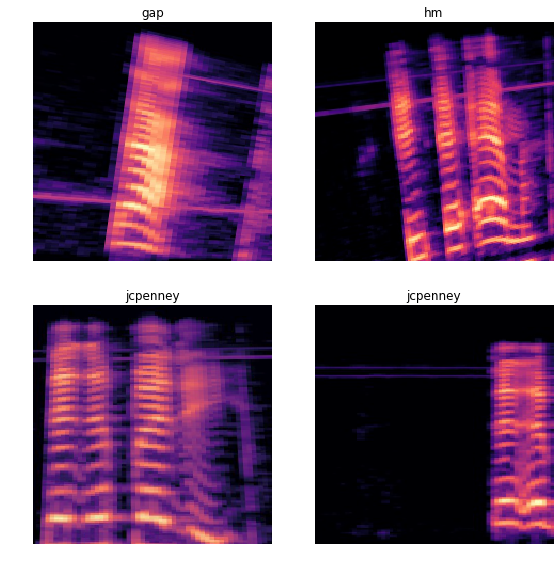

In [19]:
data.show_batch(2)

# Train 1

In [20]:
learn = create_cnn(data,models.resnet18, metrics=accuracy,
                  path=Path('D:/models/Translator/'),
                  callback_fns=[partial(SaveModelCallback,every='epoch',name='1'),
                               ShowGraph]).mixup().to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


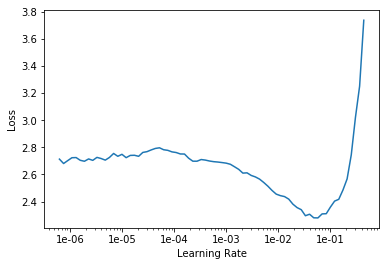

In [21]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy
1,2.567888,2.129027,0.277778
2,2.416839,1.664786,0.388889
3,2.286508,1.166340,0.555556
4,1.973641,0.853711,0.611111
5,1.807701,0.609172,0.722222
6,1.677911,0.582989,0.722222
7,1.574970,0.931249,0.611111
8,1.565667,0.480885,0.888889
9,1.592505,1.095506,0.611111
10,1.506824,0.770640,0.666667


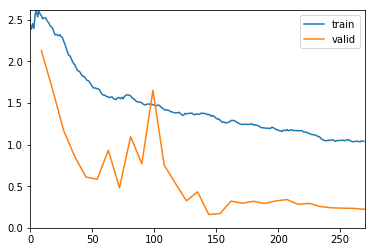

In [22]:
learn.fit_one_cycle(30,1e-2)

# End